<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/grafRed_Neuronap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

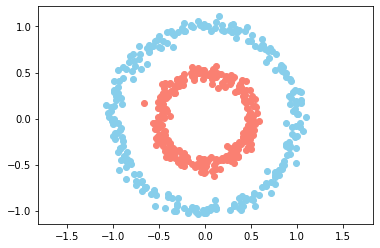

In [15]:
# p ^ n, son las dimensiones de lo que seria nuestro dataset
p = 2
n = 500

X, Y = make_circles(n_samples=n,noise=.05, factor=.5)
# n_samples-filas, noise-distorcion de points, factor-distancia de separacion entre circurferencias
#transformamos y en matriz

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0,0], X[Y[:, 0] == 0,1], c='skyblue')
#en X[Y == 0,0]-de x de la columna 0 seleccionamos en la fila a aquellos valores donde y==0
plt.scatter(X[Y[:, 0] == 1,0], X[Y[:, 0] == 1,1], c='salmon')
plt.axis('equal')
#ajusta el grafico para que se vea simetrico en x ^ y.
plt.show()

In [16]:
class neural_layer():

  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f

    self.b = np.random.rand(1, n_neur) * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

'''
ACA CREAMOS LA CLASE PARA CREAR LAS CAPAS NEURONALES DONDE LA FUNCION DE ACTIVACION ES UN PARAMETRO
Y BIAS ES UN VECTOR DE UNA FILA CON n_conn DE CARACTERISTICAS, W ES UNA MATRIZ DE n_conn X n_neur,
DONDE ESTOS DATOS DECRECEN Y CRECEN SEGUN EL LA TOPOLOGYA DE NUESTRA RED NEURONAL
'''

'\nACA CREAMOS LA CLASE PARA CREAR LAS CAPAS NEURONALES DONDE LA FUNCION DE ACTIVACION ES UN PARAMETRO\nY BIAS ES UN VECTOR DE UNA FILA CON n_conn DE CARACTERISTICAS, W ES UNA MATRIZ DE n_conn X n_neur,\nDONDE ESTOS DATOS DECRECEN Y CRECEN SEGUN EL LA TOPOLOGYA DE NUESTRA RED NEURONAL\n'

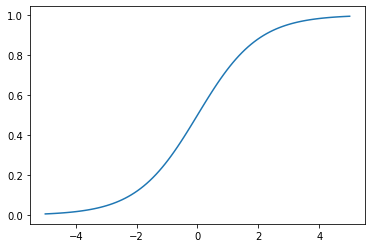

'\nCREAMOS LAS FUNCIONES QUE UTILIZAREMOS PARA REALIZAR LA CLASIFICACION\n'

In [17]:
#FUNCION DE ACTIVACION

sigm = (lambda x: 1 / (1 + np.e ** -x),
        lambda x: x * (1 - x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5,5,100)


plt.plot(_x, sigm[0](_x))
plt.show()
'''
CREAMOS LAS FUNCIONES QUE UTILIZAREMOS PARA REALIZAR LA CLASIFICACION
'''

In [18]:
def create_nn(topology, act_f):

  nn = []

  for l, leayer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn

topology = [p, 2, 4, 8, 1]



In [26]:
neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=.5, train = True):

  out = [(None, X)]

  #Forward Pass

  for l, leayer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  print(l2_cost[0](out[-1][1], Y))

  if train:

    #Backward Pass
    deltas = []

    for _ in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]

      print(a.shape)

      if l == len(neural_net) - 1:

        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))

      else:

        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W
    
    #Gradient Descent

      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      # aca en np.mean, axis es para realizar solo mean de las filas ^ keepdims- para que no altere nuestra matriz
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr 

    return out[-1][1]


train(neural_net, X, Y, l2_cost, .5)
print('')

0.27650047483594237
(500, 1)
(500, 1)
(500, 1)
(500, 1)



In [1]:
!pip install Ipython

In [20]:
import time
from IPython.display import clear_output

In [30]:
loss = []

neural_n = create_nn(topology, sigm)

for _ in range(2500):

  #ENTRNANDO LA RED

  Yp = train(neural_n, X, Y, l2_cost, lr=.1)
  
  if _ % 2 == 0:

    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for _0, x0 in enumerate(_x0):
      for _1, x1 in enumerate(_x1):
        
        _Y[_0, _1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
    plt.axis('equal')

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,1] == 0, 1], c='skyblue')
    plt.scatter(X[Y[:,1] == 1, 0], X[Y[:,0] == 1, 1], c='salmon')

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(.5)

0.30181431731687225
(500, 1)
(500, 1)
(500, 1)
(500, 1)
0.4999999919392329


TypeError: ignored

[2, 4, 8, 16, 8, 4]